# Evaluate outcome models

## Define models to evaluate

In [1]:
import outcome_models
import importlib

In [70]:
importlib.reload(outcome_models)

<module 'outcome_models' from '/Users/lovhag/Projects/yelp_causal_inference/outcome_models.py'>

In [2]:
models = {"baseline_model": outcome_models.get_baseline_model(), 
        #"linear_model": outcome_models.get_linear_model(), 
        "logistic_regression_model": outcome_models.get_logistic_regression_model(),
        "random_forest_model_1": outcome_models.get_random_forest_model_1(),
        #"random_forest_model_2": outcome_models.get_random_forest_model_2(),
        #"random_forest_model_3": outcome_models.get_random_forest_model_3(),
        #"random_forest_model_4": outcome_models.get_random_forest_model_4()
        }

## Load evaluation data

In [3]:
import pandas as pd

In [36]:
df = pd.read_csv('saved_data/data_features_interpretable.csv')
df = df.dropna(axis=0)
df.reset_index(inplace=True, drop=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10114 entries, 0 to 10113
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                10114 non-null  object 
 1   business_id            10114 non-null  object 
 2   stars                  10114 non-null  int64  
 3   useful                 10114 non-null  int64  
 4   text                   10114 non-null  object 
 5   date                   10114 non-null  object 
 6   text_length            10114 non-null  int64  
 7   nbr_words              10114 non-null  int64  
 8   lemmatized_text        10114 non-null  object 
 9   processed_text         10114 non-null  object 
 10  test                   10114 non-null  int64  
 11  Z1                     10114 non-null  int64  
 12  Z2                     10114 non-null  int64  
 13  Z3                     10114 non-null  int64  
 14  is_positive_sentiment  10114 non-null  float64
 15  se

,user_id,business_id,stars,useful,text,date,text_length,nbr_words,lemmatized_text,processed_text,test,Z1,Z2,Z3,is_positive_sentiment,sentiment_certainty,n_words,n_fans,n_reviews,useful_discrete
0,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18,937,176,get food poisoning Palms hotel scared eat buff...,After getting food poisoning at the Palms hote...,1,0,0,0,1.0,0.999428,176,0,3,0
1,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50,4975,940,feast worthy god Baccarnal Buffet Caesar Palac...,"""A feast worthy of Gods"" Baccarnal Buffet in ...",1,1,0,1,0.0,0.990075,940,330,1224,1
2,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09,671,131,crab leg well one Wicked Spoon huge prawn shee...,The crab legs are better than the ones at Wick...,1,0,0,0,1.0,0.935575,131,113,1864,1
3,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29,92,18,worth salty food expensive furst kast visit bu...,Not worth it! Too salty food and expensive! Th...,0,0,1,0,0.0,0.999454,18,0,6,0
4,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17,333,63,infinite star family diamond card Caesars Pala...,I would give this infinite stars if I could. M...,1,0,1,0,1.0,0.999430,63,0,15,0


### Count number of samples per treatment group

In [40]:
df.groupby(treatments).user_id.count()

Z1  Z2  Z3
0   0   0     3011
        1      200
    1   0     4890
        1      411
1   0   0      531
        1      222
    1   0      746
        1      103
Name: user_id, dtype: int64

## Evaluate!

In [3]:
import evaluation_help_functions

In [4]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [91]:
importlib.reload(evaluation_help_functions)

<module 'evaluation_help_functions' from '/Users/lovhag/Projects/yelp_causal_inference/evaluation_help_functions.py'>

# For discrete y

## Model performance per treatment

### Z1, Z2 - no scaling

Data loaded! Loaded data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10114 entries, 0 to 10113
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                10114 non-null  object 
 1   business_id            10114 non-null  object 
 2   stars                  10114 non-null  int64  
 3   useful                 10114 non-null  int64  
 4   text                   10114 non-null  object 
 5   date                   10114 non-null  object 
 6   text_length            10114 non-null  int64  
 7   nbr_words              10114 non-null  int64  
 8   lemmatized_text        10114 non-null  object 
 9   processed_text         10114 non-null  object 
 10  test                   10114 non-null  int64  
 11  Z1                     10114 non-null  int64  
 12  Z2                     10114 non-null  int64  
 13  buffet                 10114 non-null  int64  
 14  $                      

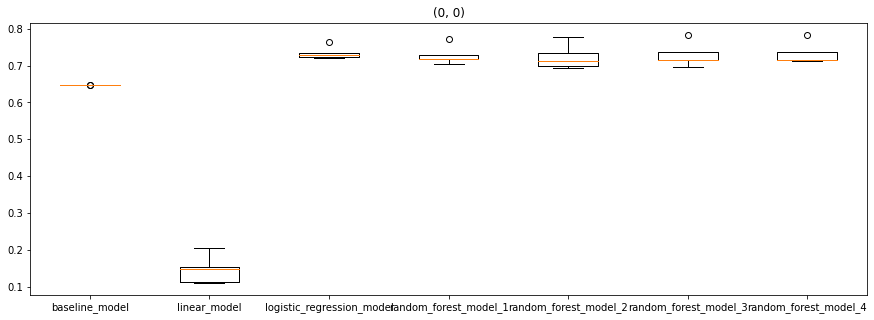

Score plot failed for plot title: (0, 1)
Caught exception: 
Dimensions of labels and X must be compatible


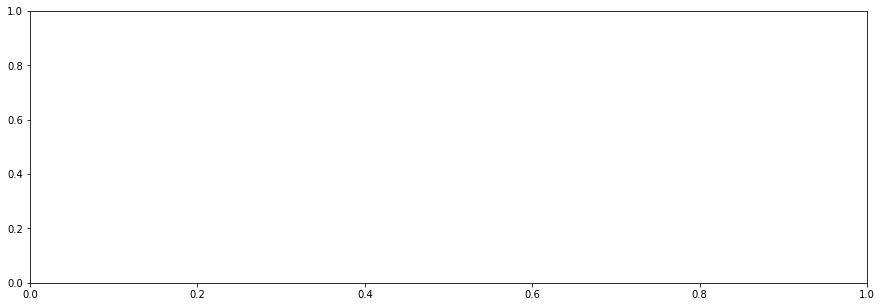

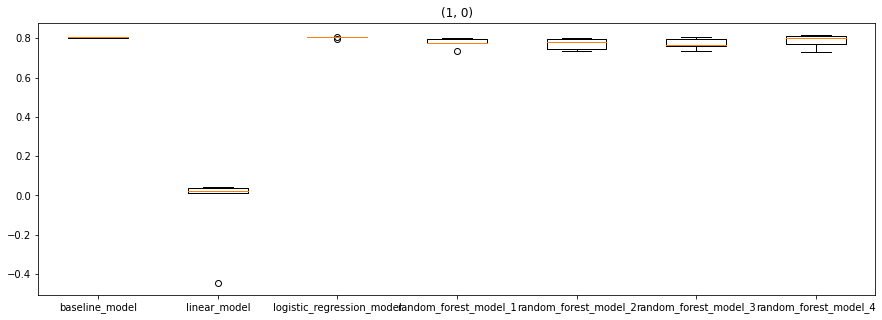

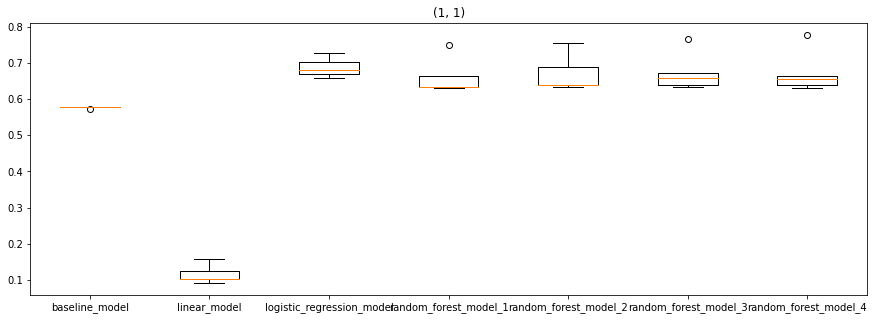

In [92]:
data = evaluation_help_functions.get_evaluation_data("saved_data/data_features_lovisa.csv", treatments = ['Z1', 'Z2'], confounders_cont = ['n_words', 'n_fans', 'n_reviews'], confounders_cat=['is_positive_sentiment', 'stars'])
print("")
score_dict = evaluation_help_functions.get_treatment_model_crossval_scores(models, data.treatment_groups, data.X_test, data.Y_test_discrete)
print("")
print("MEAN MODEL SCORE:")
print(evaluation_help_functions.get_mean_score_per_model(score_dict))
evaluation_help_functions.plot_treatment_model_scores(score_dict)

### Z1, Z2, Z3 - no scaling

Data loaded! Loaded data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10114 entries, 0 to 10113
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                10114 non-null  object 
 1   business_id            10114 non-null  object 
 2   stars                  10114 non-null  int64  
 3   useful                 10114 non-null  int64  
 4   text                   10114 non-null  object 
 5   date                   10114 non-null  object 
 6   text_length            10114 non-null  int64  
 7   nbr_words              10114 non-null  int64  
 8   lemmatized_text        10114 non-null  object 
 9   processed_text         10114 non-null  object 
 10  test                   10114 non-null  int64  
 11  Z1                     10114 non-null  int64  
 12  Z2                     10114 non-null  int64  
 13  Z3                     10114 non-null  int64  
 14  is_positive_sentiment  

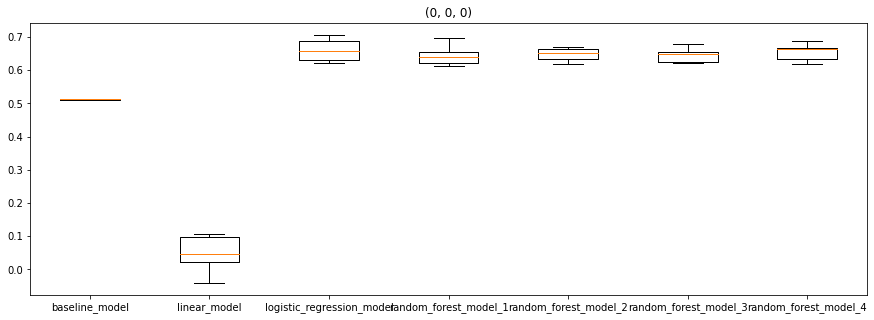

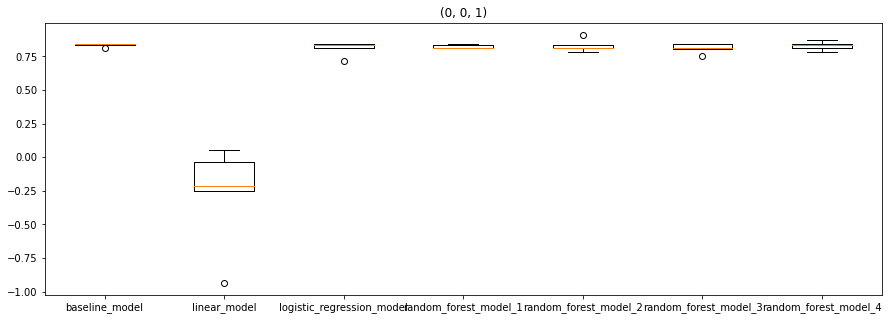

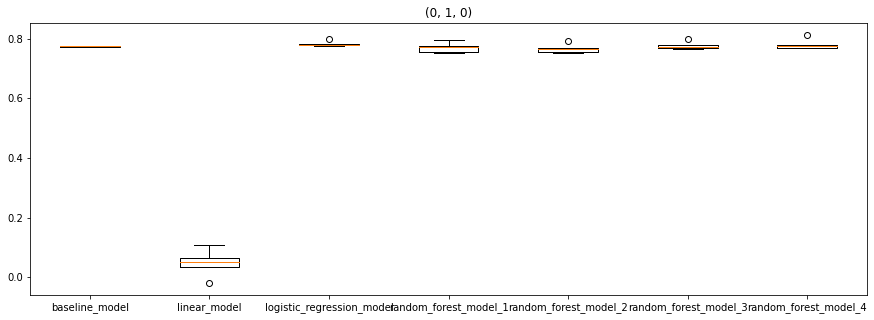

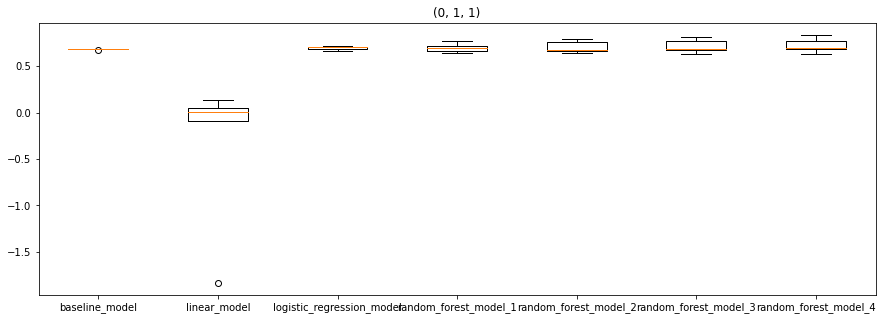

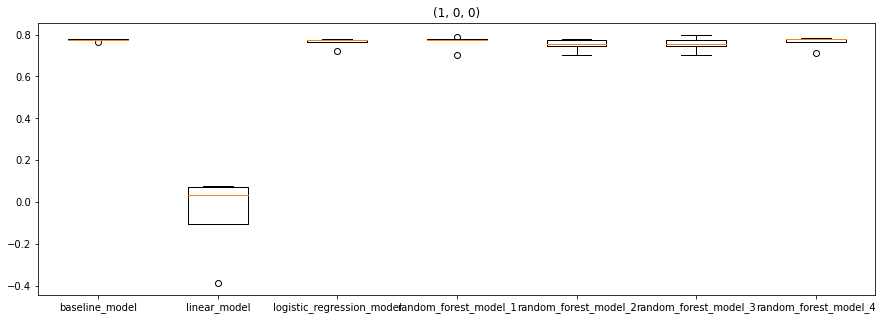

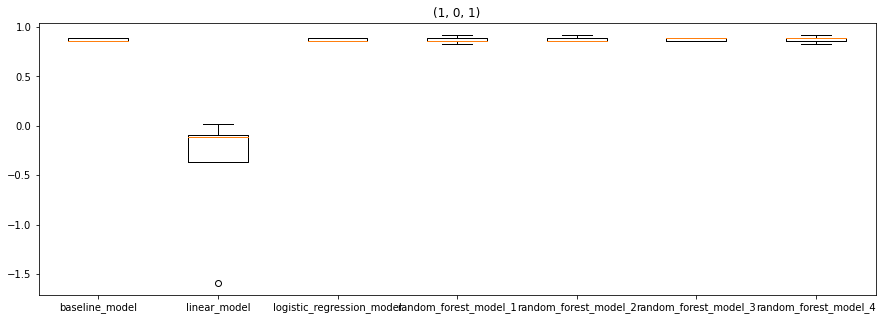

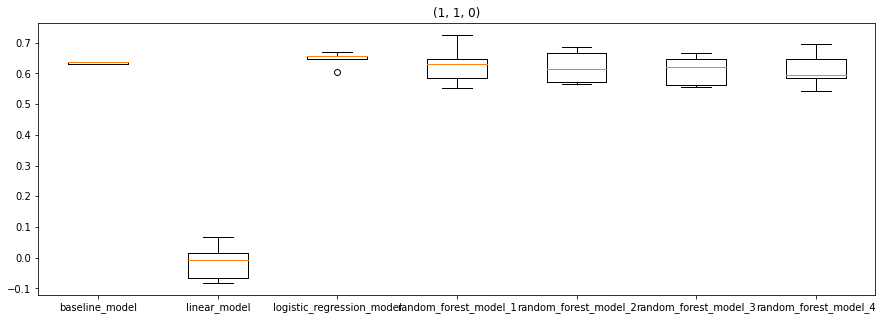

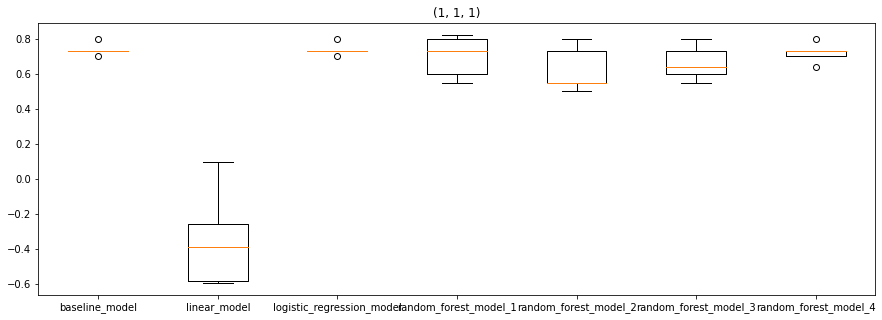

In [93]:
data = evaluation_help_functions.get_evaluation_data("saved_data/data_features_interpretable.csv", treatments = ['Z1', 'Z2', 'Z3'], confounders_cont = ['n_words', 'n_fans', 'n_reviews'], confounders_cat=['is_positive_sentiment', 'stars'])
print("")
score_dict = evaluation_help_functions.get_treatment_model_crossval_scores(models, data.treatment_groups, data.X_test, data.Y_test_discrete)
print("")
print("MEAN MODEL SCORE:")
print(evaluation_help_functions.get_mean_score_per_model(score_dict))
evaluation_help_functions.plot_treatment_model_scores(score_dict)

### Z1, Z2, Z3 - scaling

Data loaded! Loaded data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10114 entries, 0 to 10113
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                10114 non-null  object 
 1   business_id            10114 non-null  object 
 2   stars                  10114 non-null  int64  
 3   useful                 10114 non-null  int64  
 4   text                   10114 non-null  object 
 5   date                   10114 non-null  object 
 6   text_length            10114 non-null  int64  
 7   nbr_words              10114 non-null  int64  
 8   lemmatized_text        10114 non-null  object 
 9   processed_text         10114 non-null  object 
 10  test                   10114 non-null  int64  
 11  Z1                     10114 non-null  int64  
 12  Z2                     10114 non-null  int64  
 13  Z3                     10114 non-null  int64  
 14  is_positive_sentiment  

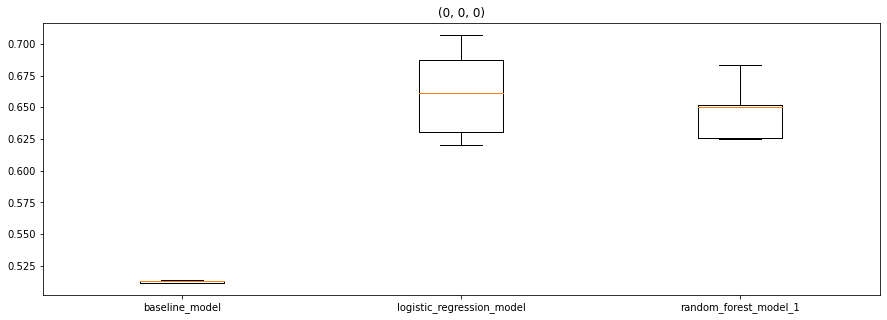

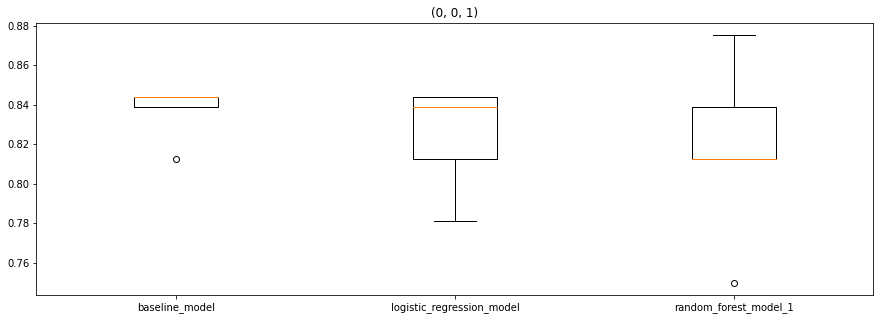

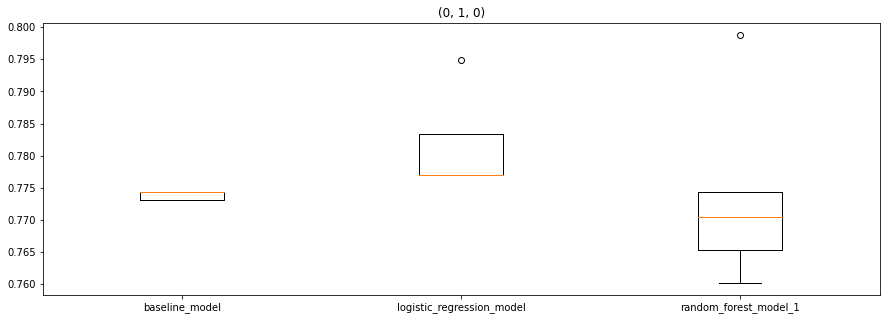

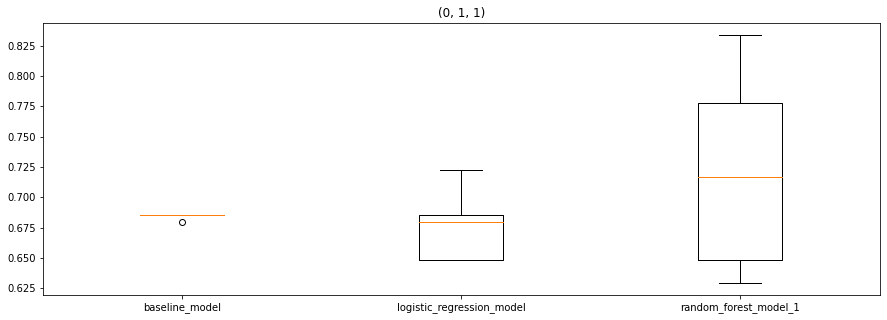

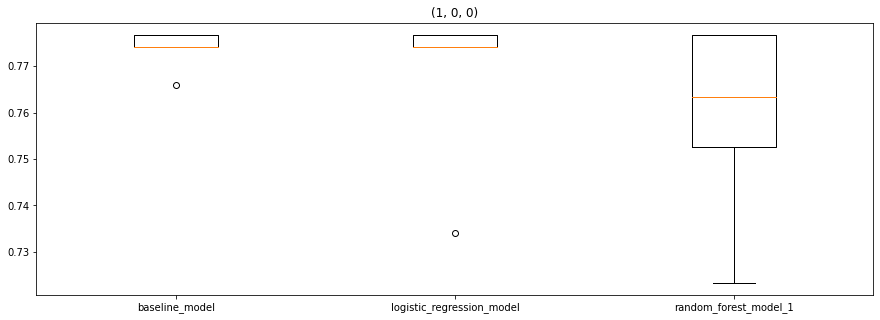

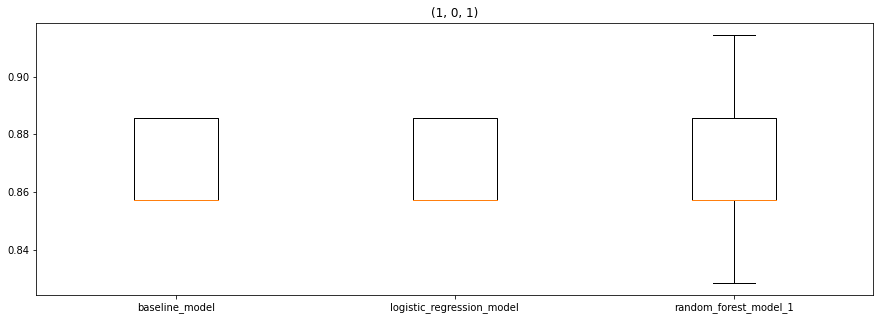

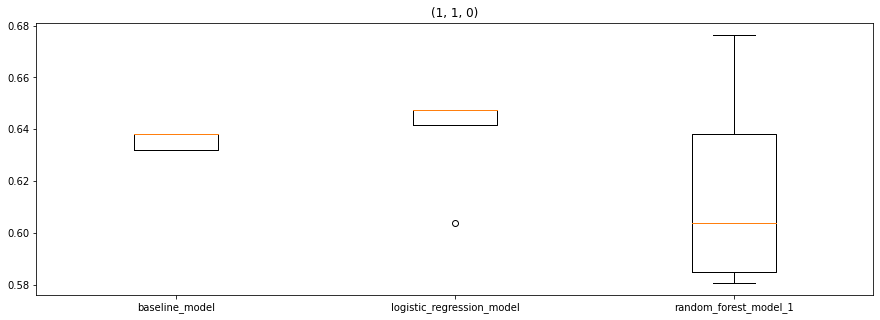

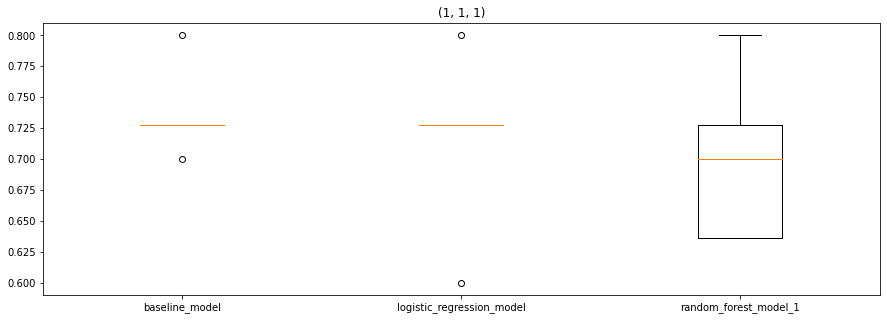

In [5]:
data = evaluation_help_functions.get_evaluation_data("saved_data/data_features_interpretable.csv", treatments = ['Z1', 'Z2', 'Z3'], confounders_cont = ['n_words', 'n_fans', 'n_reviews'], confounders_cat=['is_positive_sentiment', 'stars'])
print("")
score_dict = evaluation_help_functions.get_treatment_model_crossval_scores(models, data.treatment_groups, data.X_test_scaled, data.Y_test_discrete)
print("")
print("MEAN MODEL SCORE:")
print(evaluation_help_functions.get_mean_score_per_model(score_dict))
evaluation_help_functions.plot_treatment_model_scores(score_dict)

## Model performance trained for all treatments

### Z1, Z2, Z3 - no scaling

Data loaded! Loaded data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10114 entries, 0 to 10113
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                10114 non-null  object 
 1   business_id            10114 non-null  object 
 2   stars                  10114 non-null  int64  
 3   useful                 10114 non-null  int64  
 4   text                   10114 non-null  object 
 5   date                   10114 non-null  object 
 6   text_length            10114 non-null  int64  
 7   nbr_words              10114 non-null  int64  
 8   lemmatized_text        10114 non-null  object 
 9   processed_text         10114 non-null  object 
 10  test                   10114 non-null  int64  
 11  Z1                     10114 non-null  int64  
 12  Z2                     10114 non-null  int64  
 13  Z3                     10114 non-null  int64  
 14  is_positive_sentiment  

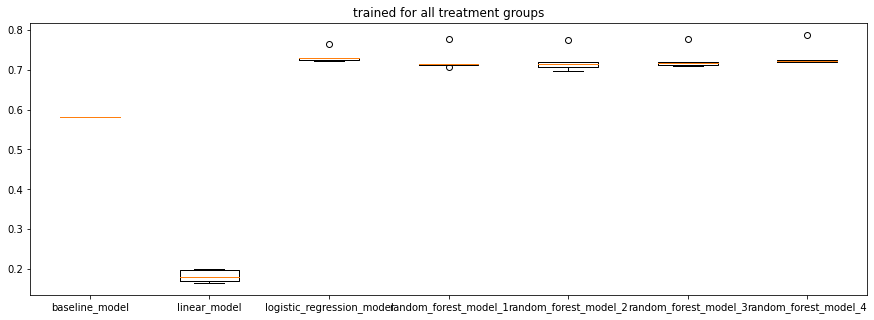

In [95]:
confounders = ['Z1','Z2', 'Z3', 'stars', 'is_positive_sentiment', 'n_words', 'n_fans', 'n_reviews']
df = evaluation_help_functions.get_pandas_data('saved_data/data_features_interpretable.csv')
score_dict = evaluation_help_functions.get_treatment_model_crossval_scores_basic(models, df[df.test==1][confounders].to_numpy(), df[df.test==1].useful_discrete)
evaluation_help_functions.plot_model_scores(score_dict, "trained for all treatment groups")

### Z1, Z2, Z3 - scaling

Data loaded! Loaded data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10114 entries, 0 to 10113
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                10114 non-null  object 
 1   business_id            10114 non-null  object 
 2   stars                  10114 non-null  int64  
 3   useful                 10114 non-null  int64  
 4   text                   10114 non-null  object 
 5   date                   10114 non-null  object 
 6   text_length            10114 non-null  int64  
 7   nbr_words              10114 non-null  int64  
 8   lemmatized_text        10114 non-null  object 
 9   processed_text         10114 non-null  object 
 10  test                   10114 non-null  int64  
 11  Z1                     10114 non-null  int64  
 12  Z2                     10114 non-null  int64  
 13  Z3                     10114 non-null  int64  
 14  is_positive_sentiment  

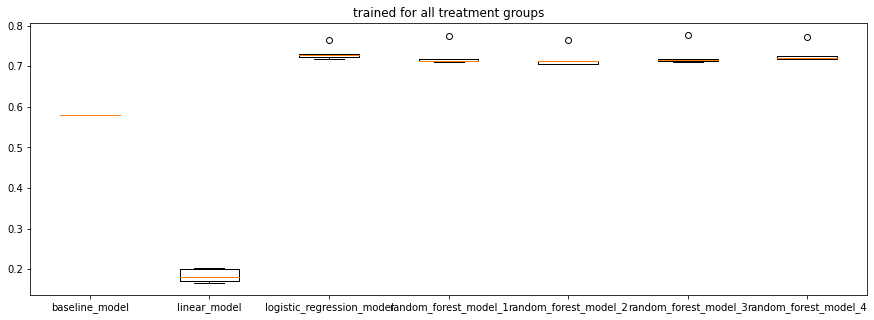

In [104]:
cols_cont = ['stars', 'n_words', 'n_fans', 'n_reviews']
cols_cat = ['Z1','Z2', 'Z3', 'is_positive_sentiment']
df = evaluation_help_functions.get_pandas_data('saved_data/data_features_interpretable.csv')
X_data_cont = df[df.test==1][cols_cont].to_numpy()
X_data_cat = df[df.test==1][cols_cat].to_numpy()
scaler = StandardScaler()
scaler.fit(X_data_cont)
X_data_cont = scaler.transform(X_data_cont)
X_data = np.concatenate((X_data_cont, X_data_cat), axis=1)
Y_data = df[df.test==1].useful_discrete
score_dict = evaluation_help_functions.get_treatment_model_crossval_scores_basic(models, X_data, Y_data)
evaluation_help_functions.plot_model_scores(score_dict, "trained for all treatment groups")

## Best model per treatment context feature importances for predicting outcome

In [110]:
X_cols_cat = ['is_positive_sentiment', 'stars']
X_cols_cont = ['n_words', 'n_fans', 'n_reviews']

data = evaluation_help_functions.get_evaluation_data("saved_data/data_features_interpretable.csv", treatments = ['Z1', 'Z2', 'Z3'], confounders_cont=X_cols_cont, confounders_cat=X_cols_cat)

for treatment_group in data.treatment_groups:
    print("")
    print(f"BEST MODEL FEATURE IMPORTANCES {treatment_group}")

    best_model = models['logistic_regression_model']
    best_model.fit(data.X_train_scaled[treatment_group], data.Y_train_discrete[treatment_group])
    importances = best_model.coef_[0]
    for i, col_name in enumerate(X_cols):
        print(f'{col_name}: {importances[i]}')

Data loaded! Loaded data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10114 entries, 0 to 10113
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                10114 non-null  object 
 1   business_id            10114 non-null  object 
 2   stars                  10114 non-null  int64  
 3   useful                 10114 non-null  int64  
 4   text                   10114 non-null  object 
 5   date                   10114 non-null  object 
 6   text_length            10114 non-null  int64  
 7   nbr_words              10114 non-null  int64  
 8   lemmatized_text        10114 non-null  object 
 9   processed_text         10114 non-null  object 
 10  test                   10114 non-null  int64  
 11  Z1                     10114 non-null  int64  
 12  Z2                     10114 non-null  int64  
 13  Z3                     10114 non-null  int64  
 14  is_positive_sentiment  

In [ ]:
print("")
print("BEST MODEL FEATURE IMPORTANCES")
best_model = models['logistic_regression_model']
best_model.fit(X_data, Y_data)
# get importance
importances = best_model.coef_[0]
# summarize feature importance
for i, col_name in enumerate(X_cols):
	print(f'{col_name}: {importances[i]}')
# plot feature importance
#plt.bar([x for x in range(len(importance))], importance)
#plt.show()

## Best model context feature importances for predicting outcome

In [105]:
X_cols_cont = ['stars', 'n_words', 'n_fans', 'n_reviews']
X_cols_cat = ['Z1','Z2', 'Z3', 'is_positive_sentiment']
X_cols = X_cols_cont+X_cols_cat
df = evaluation_help_functions.get_pandas_data('saved_data/data_features_interpretable.csv')
X_data_cont = df[df.test==1][X_cols_cont].to_numpy()
X_data_cat = df[df.test==1][X_cols_cat].to_numpy()
scaler = StandardScaler()
scaler.fit(X_data_cont)
X_data_cont = scaler.transform(X_data_cont)
X_data = np.concatenate((X_data_cont, X_data_cat), axis=1)
Y_data = df[df.test==1].useful_discrete

print("")
print("BEST MODEL FEATURE IMPORTANCES")
best_model = models['logistic_regression_model']
best_model.fit(X_data, Y_data)
# get importance
importances = best_model.coef_[0]
# summarize feature importance
for i, col_name in enumerate(X_cols):
	print(f'{col_name}: {importances[i]}')
# plot feature importance
#plt.bar([x for x in range(len(importance))], importance)
#plt.show()

Data loaded! Loaded data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10114 entries, 0 to 10113
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                10114 non-null  object 
 1   business_id            10114 non-null  object 
 2   stars                  10114 non-null  int64  
 3   useful                 10114 non-null  int64  
 4   text                   10114 non-null  object 
 5   date                   10114 non-null  object 
 6   text_length            10114 non-null  int64  
 7   nbr_words              10114 non-null  int64  
 8   lemmatized_text        10114 non-null  object 
 9   processed_text         10114 non-null  object 
 10  test                   10114 non-null  int64  
 11  Z1                     10114 non-null  int64  
 12  Z2                     10114 non-null  int64  
 13  Z3                     10114 non-null  int64  
 14  is_positive_sentiment  

# For continuous y

Model evaluation failed for treatment: (0, 1)
Caught exception: 
Expected sequence or array-like, got <class 'NoneType'>
Model evaluation failed for treatment: (0, 1)
Caught exception: 
Expected sequence or array-like, got <class 'NoneType'>
Model evaluation failed for treatment: (0, 1)
Caught exception: 
Expected sequence or array-like, got <class 'NoneType'>
Model evaluation failed for treatment: (0, 1)
Caught exception: 
Expected sequence or array-like, got <class 'NoneType'>
Model evaluation failed for treatment: (0, 1)
Caught exception: 
Expected sequence or array-like, got <class 'NoneType'>


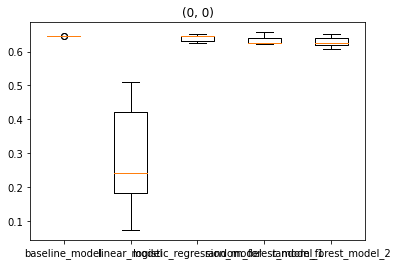

Score plot failed for treatment: (0, 1)
Caught exception: 
Dimensions of labels and X must be compatible


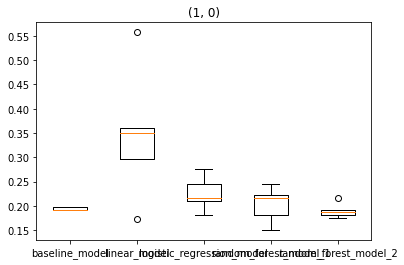

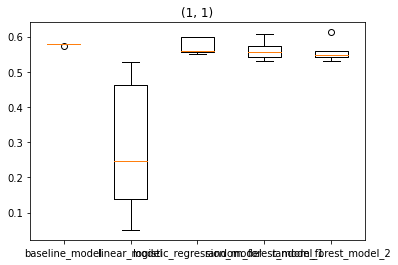

In [35]:
score_dict = get_treatment_model_crossval_scores(models, data.treatment_groups, data.X_test, data.Y_test)
plot_treatment_model_scores(score_dict)

Data loaded! Loaded data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10114 entries, 0 to 10113
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                10114 non-null  object 
 1   business_id            10114 non-null  object 
 2   stars                  10114 non-null  int64  
 3   useful                 10114 non-null  int64  
 4   text                   10114 non-null  object 
 5   date                   10114 non-null  object 
 6   text_length            10114 non-null  int64  
 7   nbr_words              10114 non-null  int64  
 8   lemmatized_text        10114 non-null  object 
 9   processed_text         10114 non-null  object 
 10  test                   10114 non-null  int64  
 11  Z1                     10114 non-null  int64  
 12  Z2                     10114 non-null  int64  
 13  Z3                     10114 non-null  int64  
 14  is_positive_sentiment  

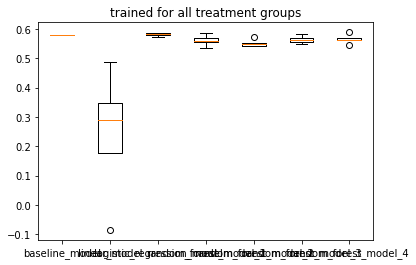

In [76]:
confounders = ['Z1','Z2', 'Z3', 'is_positive_sentiment', 'n_words', 'n_fans', 'n_reviews']
df = get_pandas_data('saved_data/data_features_interpretable.csv')
score_dict = get_treatment_model_crossval_scores_basic(models, df[df.test==1][confounders].to_numpy(), df[df.test==1].useful)
plot_model_scores(score_dict, "trained for all treatment groups")

##